# Examining Heart Disease Classifiers

### Problem Statement
The problem is that cardiovascular diseases are the leading cause of death globally. The World Health Organization estimates that 17.9 million people died from cardiovascular disease in 2019, representing 32% of all global deaths. 85% of the deaths caused by the cardiovascular system were due to heart attack and stroke. Cardiovascular disease causes 38% of premature deaths. Heart disease is a common ailment, and this dataset contains 11 features that may predict heart disease. This dataset will help develop an early detection classifier to help patients prevent heart failure.

### Project Learning Goals
The learning experience is to develop multiple machine learning models from beginning to end. The project will allow the student to explore the dataset and perform clustering analyses. The project will enable the student to make critical decisions regarding data selection and management.

### Dataset
The dataset has 918 data points and 11 features. The dataset is compiled from five different sources. Out of the 11 total features, four are numerical, and seven are categorical. There is no missing data. However, there are abnormal values for cholesterol for 18.7% of the data points. The odd data resulted in the removal of the cholesterol feature. Additionally, one data point was removed due to an abnormal heart rate value.

### Literature review
Three papers and one article were used as a reference for this project. Sharma et al. is a study that compared the performance of SVM, decision tree, naïve bayes, and random forest on the Cleveland Heart Disease Dataset. Gavhane et al. provide an evaluation of a multi-layer perceptron algorithm. The multi-layer perceptron algorithm will give a performance comparison to the other algorithms in the project. Shah et al. compare naïve bayes, decision tree, k nearest neighbor, and random forest performance on a heart disease dataset. Dan Berdikulov provides a reference for dealing with missing/poor quality data.

### Hypothesis
We think that XGBoost will provide the best predictor in this project. We believe that gradient boosting will give a better model because it will constantly improve its predecessors during training.

We also predict that removing the cholesterol Feature will result in significantly improved results. We believe this because there were many cholesterol values are 0. We think that having a significant amount of 0 cholesterol values (not biologically possible) will hurt the analysis. 

### Methods/Results

In [2]:
# imports numpy package as np (allows work with arrays)
import numpy as np
# imports pandas package as pd (allows work with dataframes)
import pandas as pd
# imports math to use mathematical equations
import math
# imports the mean function from statistics package
from statistics import mean
# import the statistical functions from scipy
from scipy import stats
# imports the seaborn package as sns
import seaborn as sns
# imports the warning package (allows warnings to be ignored)
import warnings 
# import sklearn which has a variety of useful functions
import sklearn 
# preprocessing function is imported
from sklearn import preprocessing
# One-hot encoding capability has been imported
from sklearn.preprocessing import OneHotEncoder

#imports packages that will help test the models
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score, StratifiedKFold
# imports the function to obtain the f1 score?
from sklearn.metrics import classification_report,f1_score
# imports matplotlib to allow graphs to be developed
import matplotlib.pyplot as plt
# imports Support Machine Algorithm for classification
from sklearn.svm import SVC
# imports logistic regression model
from sklearn.linear_model import LogisticRegression
# imports the 
from sklearn.neighbors import KNeighborsClassifier
# allows us to resample different indices
from sklearn.utils import resample
# Used for scaling
from sklearn.preprocessing import StandardScaler
# imports the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Imports the pipeline function
from sklearn.pipeline import Pipeline
# imports PCA
from sklearn.decomposition import PCA
# imports AUC score 
from sklearn.metrics import roc_auc_score
import xgboost as xgb

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

In [5]:
a=df.dtypes
a

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There is evidence of missing data. It is unlikely that an adult would have 0 RestingBP, or 0 Cholesterol. FastingBS seems to be a binary category. 

In [7]:
#from the above there is no datatype object that condradicts with the above description

# we splitted the dataset based on feature type=categorical and numeric. 
allFeatures=df.columns[0:len(df.columns) - 1]
catFeatures=[]
for i in range((len(df.columns)-1)):
    if df.dtypes[i]=='O':
        print(i)
        catFeatures.append(i)
catFeatures.append(5) #fasting bs is categorical 1: if FastingBS > 120 mg/dl, 0: otherwise

catFeatures=df.columns[catFeatures]
print(catFeatures)

numFeatures= [i for i in allFeatures if not(i in catFeatures)]
print(allFeatures)

1
2
6
8
10
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'FastingBS'],
      dtype='object')
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [8]:
df[numFeatures].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [9]:
#get rid of min resting bp
s=0
c= np.where(df['RestingBP']==0)
print(c[0])
df.iloc[449]

[449]


Age                   55
Sex                    M
ChestPainType        NAP
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG        Normal
MaxHR                155
ExerciseAngina         N
Oldpeak              1.5
ST_Slope            Flat
HeartDisease           1
Name: 449, dtype: object

In [10]:
df=df.drop(index=449,axis=0) #removed this index because it has resting BP. and Cholestrol zero

In [11]:
df=df.reset_index()
df=df.drop(['index'],axis=1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6078d69610>,
      dtype=object)

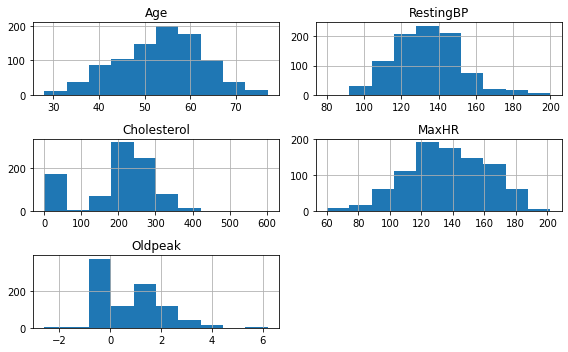

In [13]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
df[numFeatures].hist()
#It appears that Age, Resting BP and MaxHR have normal distributions, Whereas cholesterol and oldpeak have left skew


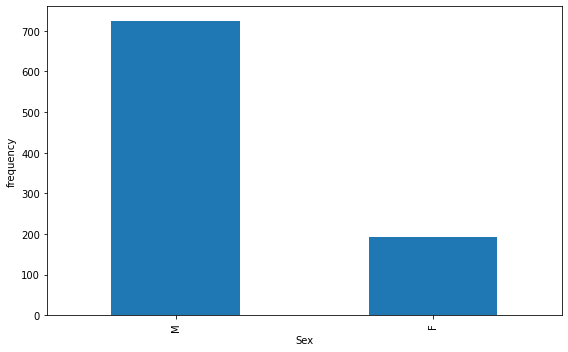

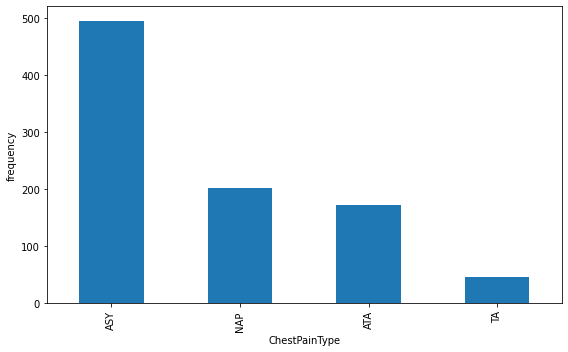

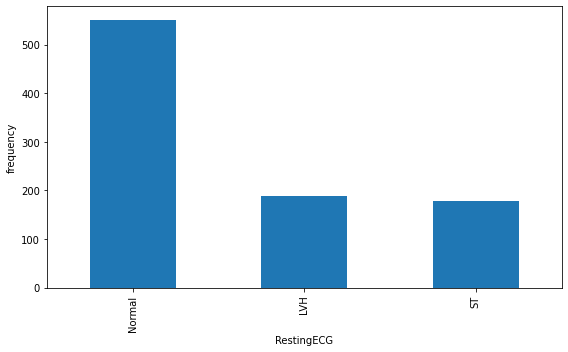

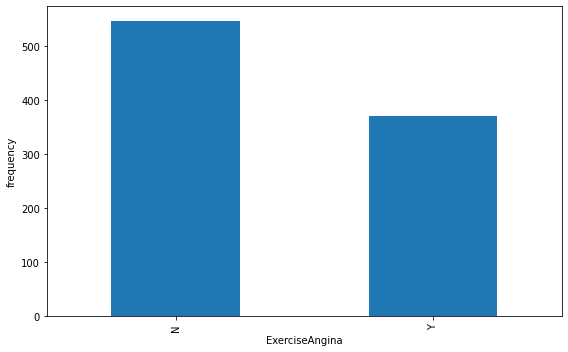

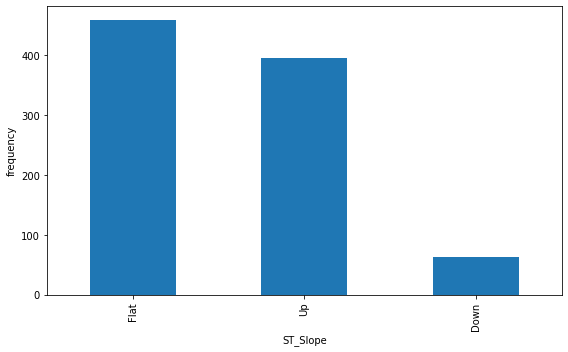

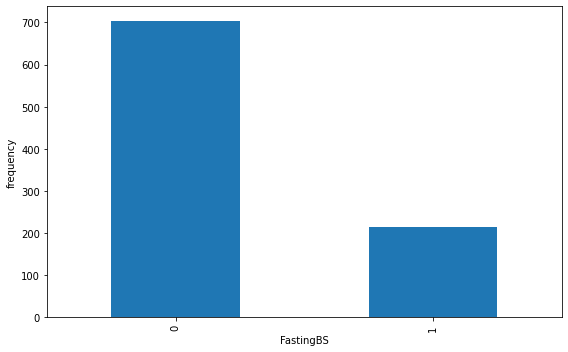

In [19]:
for cat in catFeatures:
    fig, ax = plt.subplots()
    df[cat].value_counts().plot(ax=ax, kind='bar', xlabel=cat, ylabel='frequency')
    plt.show()

The categorical data seems to be skewed in all of the categories. For example, there is a strong over representation of males in our data set. The above graphs show the relative abundance of each category. 

In [20]:
for i in catFeatures:
    a=df[i].describe()
    print('\nDescribe for '+ str(i))
    print(a)


Describe for Sex
count     917
unique      2
top         M
freq      724
Name: Sex, dtype: object

Describe for ChestPainType
count     917
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

Describe for RestingECG
count        917
unique         3
top       Normal
freq         551
Name: RestingECG, dtype: object

Describe for ExerciseAngina
count     917
unique      2
top         N
freq      546
Name: ExerciseAngina, dtype: object

Describe for ST_Slope
count      917
unique       3
top       Flat
freq       459
Name: ST_Slope, dtype: object

Describe for FastingBS
count    917.000000
mean       0.233370
std        0.423206
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64


In [21]:
df.isnull().sum() #No null observations

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [22]:
numFeatures.append('HeartDisease')
numFeatures

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

In [23]:
corr_matrix=df[numFeatures].corr()
print(corr_matrix)

                   Age  RestingBP  ...   Oldpeak  HeartDisease
Age           1.000000   0.263084  ...  0.258563      0.282012
RestingBP     0.263084   1.000000  ...  0.174252      0.117990
Cholesterol  -0.095142   0.089392  ...  0.051390     -0.231479
MaxHR        -0.382280  -0.109693  ... -0.161213     -0.401410
Oldpeak       0.258563   0.174252  ...  1.000000      0.403638
HeartDisease  0.282012   0.117990  ...  0.403638      1.000000

[6 rows x 6 columns]


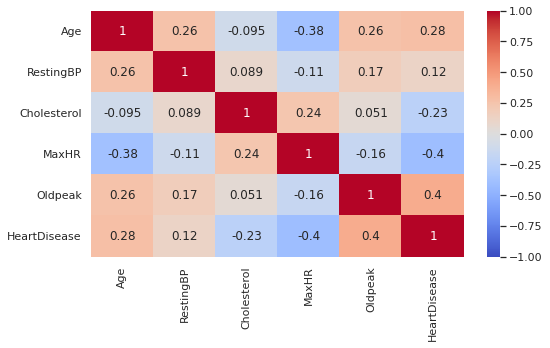

In [24]:
#Visualize Pearson pairwise correlation of features
fig = plt.figure()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(corr_matrix,cmap='coolwarm', vmin=-1, vmax=1,annot = True)
plt.xticks(rotation=90)
ax.set_xticklabels(df[numFeatures].columns)
ax.set_yticklabels(df[numFeatures].columns)
plt.show()

None of the variables have strong correlations with one another. The largest correlation is between Heart Disease and MaxHR at -0.4. The -0.4 means that maxHR and Heart Disease are moderately inversely correlated with one another. The largest positive correaltion occurs between the Heart Disease variable and the Oldpeak variable with a value of 0.4.

In [25]:
# creates a new dataframe for PCA/KMeans clustering
df_cluster = df[allFeatures]
df_cluster

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
913,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
914,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
915,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [26]:
# imports scaling function
from sklearn.preprocessing import scale

# new df with get dummies
df_new = pd.get_dummies(df_cluster, columns=catFeatures)

# scaled the data
scaled = scale(df_new)
# perform the PCA to obtain two principle components
pca_model = PCA()
pca_model = pca_model.fit_transform(scaled)

pca_arr = []

for i in range(21):
    i = i + 1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
# create a dataframe with the PCA components
df_pca = pd.DataFrame(pca_model, columns = pca_arr)

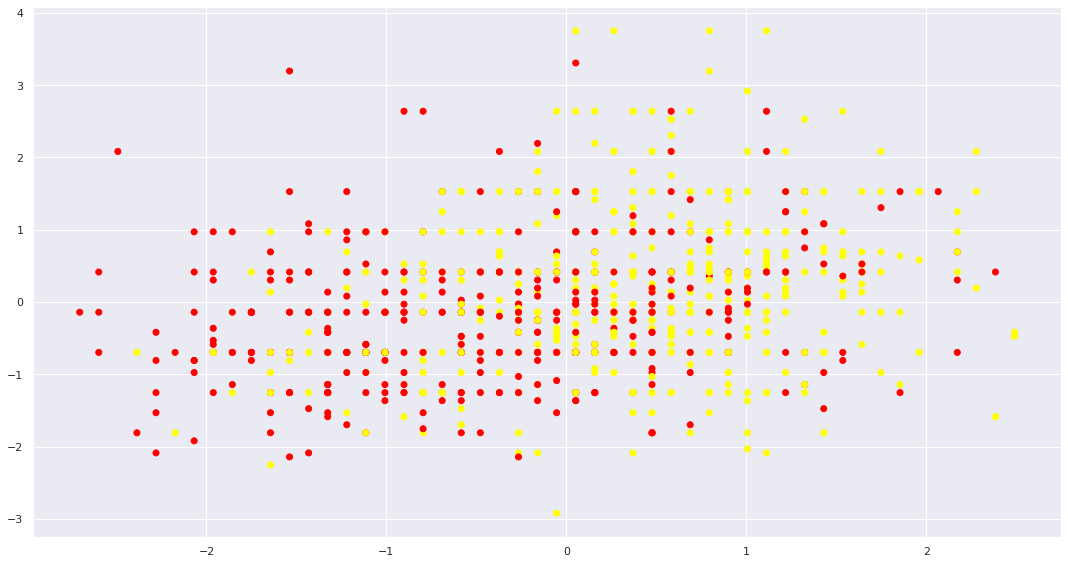

In [27]:
# imports K Means clustering
from sklearn.cluster import KMeans
fig, ax1 = plt.subplots()

# scales the data
scaled = scale(df_new)

# K = 2 for the KMeans algorithm
y_pred = KMeans(n_clusters = 2, init = 'random', max_iter = 5).fit_predict(scaled)
plt.scatter(scaled[:,0], scaled[:,1], c = y_pred, cmap = 'autumn')
    
plt.show()

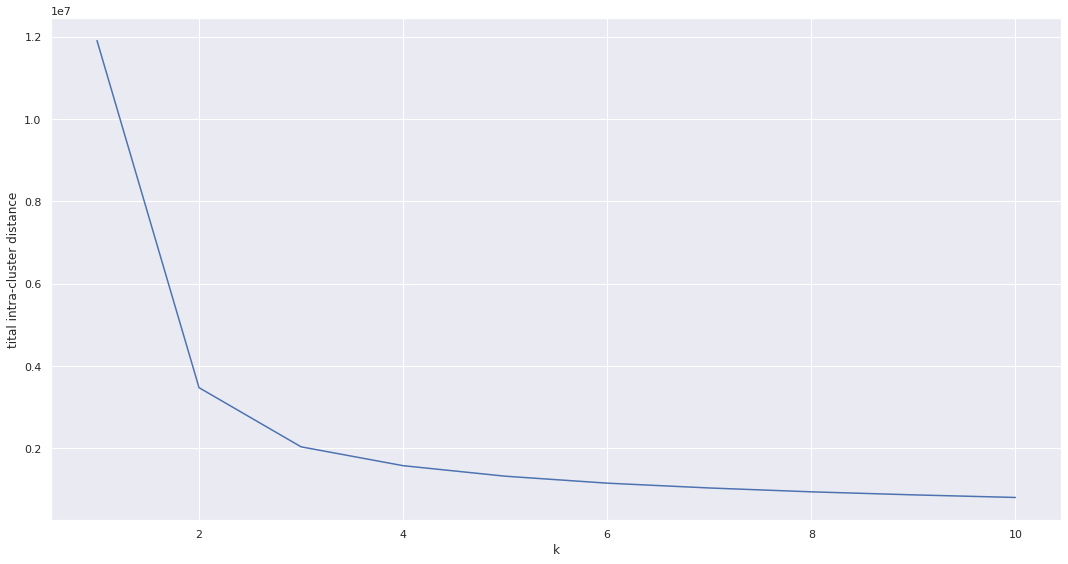

In [28]:
ks = list(range(1,11))

scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(df_new)
    scores.append(-model.score(df_new))
    
plt.plot(ks,scores)
plt.ylabel('tital intra-cluster distance')
plt.xlabel('k')
plt.show()

Visual observation of the intra-cluster shows that k = 2 is the optimum k value. However, the KMeans clustering performed on the PCA analysis does not provide a definite separation between the two groups.  

In [29]:
#dfC is the dataFrame w/ cholesterol
dfC=df
#Remove Cholesterol variable
df = df.drop(labels = "Cholesterol", axis = 1)

In [30]:
allFeatures=df.columns[0:len(df.columns)-1].tolist()

catFeatures=[]
for i in range((len(df.columns)-1)):
    if df.dtypes[i]=='O':
        print(i)
        catFeatures.append(i)
catFeatures.append(4) #fasting bs is categorical 1: if FastingBS > 120 mg/dl, 0: otherwise

catFeatures=df.columns[catFeatures].tolist()
print(catFeatures)

numFeatures= [i for i in allFeatures if not(i in catFeatures)]
print(numFeatures)

1
2
5
7
9
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
['Age', 'RestingBP', 'MaxHR', 'Oldpeak']


In [31]:
#HC CLUSTERING
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn import preprocessing

In [32]:
X = df[allFeatures]
y = df["HeartDisease"]

scaler = StandardScaler() #Creates a SKlearn standard Scaler object

    
#STANDARD SCALER
scaler.fit(X[numFeatures]) 
X[numFeatures]=scaler.transform(X[numFeatures])

#Label encoding
le = preprocessing.LabelEncoder()
for feature in catFeatures:
    X[feature] = le.fit_transform(X[feature])

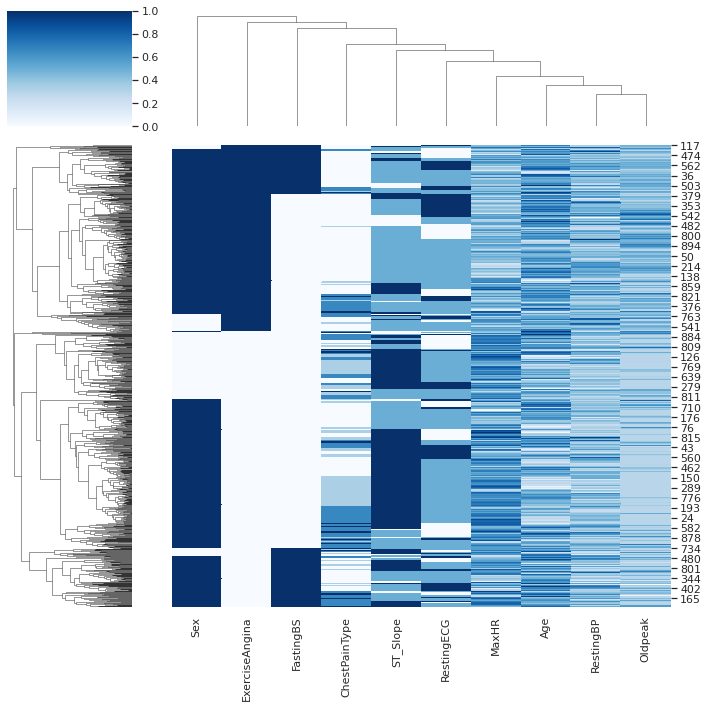

In [33]:
# Heat map with scaling and label encoder
g = sns.clustermap(X, method = "average", metric="euclidean", cmap="Blues", standard_scale = 1)
# This clustermap was created using a label encoder for the categorical variables. 
# It shows that the the closest related features are oldpeak and resting BP

In [34]:
X = df[allFeatures]
y = df["HeartDisease"]

scaler = StandardScaler() #Creates a SKlearn standard Scaler object

    
#STANDARD SCALER
scaler.fit(X[numFeatures]) 
X[numFeatures]=scaler.transform(X[numFeatures])

#Get dummies
X = pd.get_dummies(X, columns=catFeatures) 


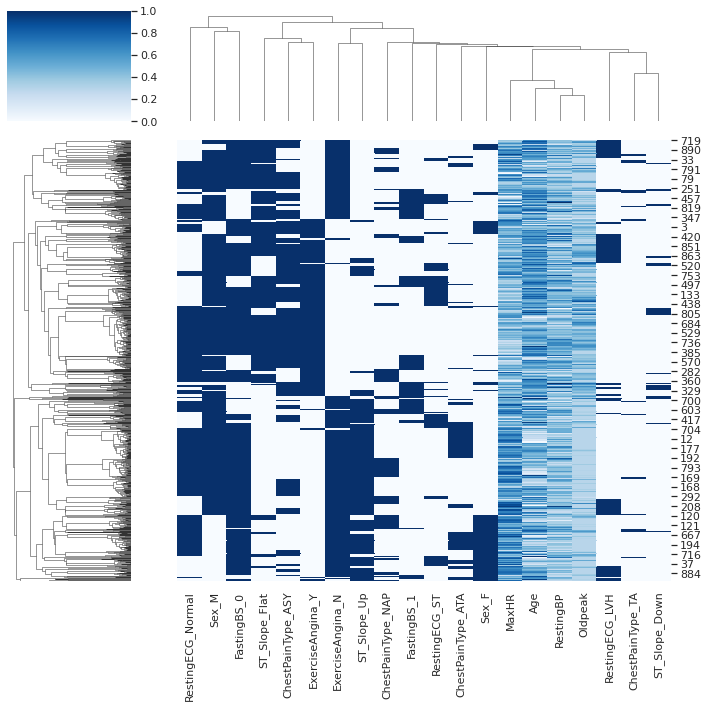

In [35]:
# Heat map with scaling and get dummies
g = sns.clustermap(X, method = "average", metric="euclidean", cmap="Blues", standard_scale = 1)
# This is the same type of clustermap, only this time we used get dummies to seperate out the categorical variables
# This still shows that the most highely correlated variables are oldpeak and restingBp

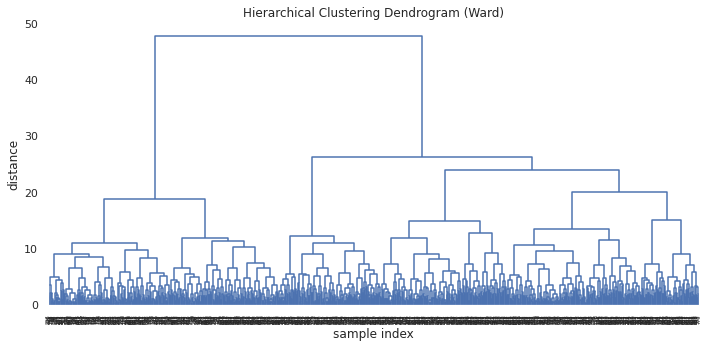

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(10, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

#It appears that having two clusters is the best way to go on this data set. If you tried do get 3 clusters you 
#wouldn't get very good seperation between clusters 2 and 3

## Analysis without Cholesterol

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df[allFeatures], df["HeartDisease"], test_size = 0.2, random_state=42, stratify=df["HeartDisease"])


In [38]:
train = pd.concat([X_train, y_train], axis=1)
train = train.reset_index(drop=True)
train

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,49,M,ASY,128,0,Normal,96,Y,0.0,Flat,1
1,68,M,NAP,134,1,Normal,151,Y,0.0,Up,0
2,59,M,NAP,126,1,Normal,134,N,2.2,Flat,1
3,67,M,ASY,125,1,Normal,163,N,0.2,Flat,1
4,52,M,ASY,160,0,Normal,94,Y,2.5,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...
728,51,M,NAP,135,0,Normal,150,N,2.0,Flat,1
729,46,M,NAP,120,0,Normal,150,N,0.0,Up,0
730,59,M,NAP,131,0,Normal,128,Y,2.0,Down,1
731,61,M,ASY,125,0,ST,115,Y,0.0,Up,0


In [39]:
np.random.seed(1) #Set a random seed for reproducibility
inBags = [] 
outBags = []

for i in range(40): #Loop through 50 times to create 50 InBags/OutBags
    
    curInBag = sklearn.utils.resample(train, replace=True) #Creates a boot strap inBag the length of boston with replacement
    
    outBagRows = [] #to hold all of the rows not represented in the inBag
    for i in range(len(train)): 
        if i not in np.unique(list(curInBag.index)):  #Check to see if the row is not represented in the current in bag
            
            outBagRows.append(train.loc[i].to_frame().T) # When I select a row not in the in bag, it is a series
                                                           # I Use the .to_frame to convert the series to a DataFrame
                                                           # The data Frame is oriented the wrong way so the .T transposes it
    
    curOutBag = pd.concat(outBagRows) #This concatenates all of the out bag rows into one DF

    #This if statment checks to see if every row of boston is represnted between the cur inbag and the cur outbag
    if len(np.unique(list(curInBag.index))) + len(np.unique(list(curOutBag.index))) != len(train):
        print("ERROR! ALl of the unique values should be represented")

    #Add the inbag/outBag to their respective lists
    inBags.append(curInBag)
    outBags.append(curOutBag)

In [40]:
scaler = StandardScaler() #Creates a SKlearn standard Scaler object

for i in range(len(inBags)): #Loop through each of the inBags
    
    #STANDARD SCALER
    scaler.fit(inBags[i][numFeatures]) #Transforms inBags
    inBags[i][numFeatures]=scaler.transform(inBags[i][numFeatures])

    scaler.fit(outBags[i][numFeatures]) #Transforms outBags
    outBags[i][numFeatures]=scaler.transform(outBags[i][numFeatures])
    
    #ENCODE CATEGORICAL VARIABLES
   
    inBags[i] = pd.get_dummies(inBags[i], columns=catFeatures)  #Transform inBags
    outBags[i] = pd.get_dummies(outBags[i], columns=catFeatures)  #Transform outBags
    


In [41]:
xFeatures = inBags[0].columns.tolist()
xFeatures.remove('HeartDisease')
yFeatures = ['HeartDisease']

In [42]:
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

model_rf=RandomForestClassifier(random_state=1)
rf_pipeline = Pipeline([ 
    ('model_rf',model_rf)
])
rf_param = {
               'model_rf__bootstrap': [True, False],
               'model_rf__max_depth': [2, 3, 5, 7, 9],
               'model_rf__max_features': [10],
               'model_rf__n_estimators': [10, 100, 500]} 

rf_random_f1 = RandomizedSearchCV(rf_pipeline, rf_param, cv=cv_inner, scoring='f1')
rf_random_auc = RandomizedSearchCV(rf_pipeline, rf_param, cv=cv_inner, scoring='roc_auc')

In [43]:
rfModels_f1 = []
rfModels_auc = []

rfScores_f1 = []
rfScores_auc = []

for i in range(len(inBags)):
    print(i)
    model_f1 = rf_random_f1.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    rfModels_f1.append(model_f1)
    
    model_auc = rf_random_auc.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    rfModels_auc.append(model_auc)
    
    curScore_f1 = f1_score(outBags[i][yFeatures].squeeze().tolist(), model_f1.predict(outBags[i][xFeatures]))
    rfScores_f1.append(curScore_f1)
    
    curScore_auc = roc_auc_score(outBags[i][yFeatures].squeeze().tolist(), model_auc.predict(outBags[i][xFeatures]))
    rfScores_auc.append(curScore_auc)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [44]:
print(rfScores_f1)
print(rfScores_auc)

[0.8709677419354838, 0.8729641693811075, 0.8362369337979093, 0.8620689655172414, 0.8673139158576052, 0.8444444444444446, 0.8673139158576052, 0.8484848484848485, 0.8424657534246576, 0.8769716088328076, 0.8590163934426229, 0.879725085910653, 0.86, 0.882758620689655, 0.85, 0.8690095846645367, 0.8507936507936509, 0.8541666666666667, 0.8648648648648649, 0.8535031847133757, 0.8681672025723473, 0.8707482993197279, 0.8581314878892733, 0.8571428571428571, 0.8707482993197279, 0.8368794326241136, 0.8435374149659864, 0.8589743589743589, 0.8397435897435898, 0.8287671232876712, 0.8618421052631579, 0.859016393442623, 0.8310810810810811, 0.822742474916388, 0.8361204013377925, 0.8552188552188552, 0.8580246913580247, 0.8512110726643599, 0.8435374149659863, 0.8108108108108109]
[0.840360923130314, 0.8570155201342282, 0.8233739837398375, 0.8398158179848321, 0.8246215704824976, 0.8147537496011064, 0.8418459319793294, 0.826463963963964, 0.8268678160919539, 0.8415494899365866, 0.8374931129476584, 0.8709570225

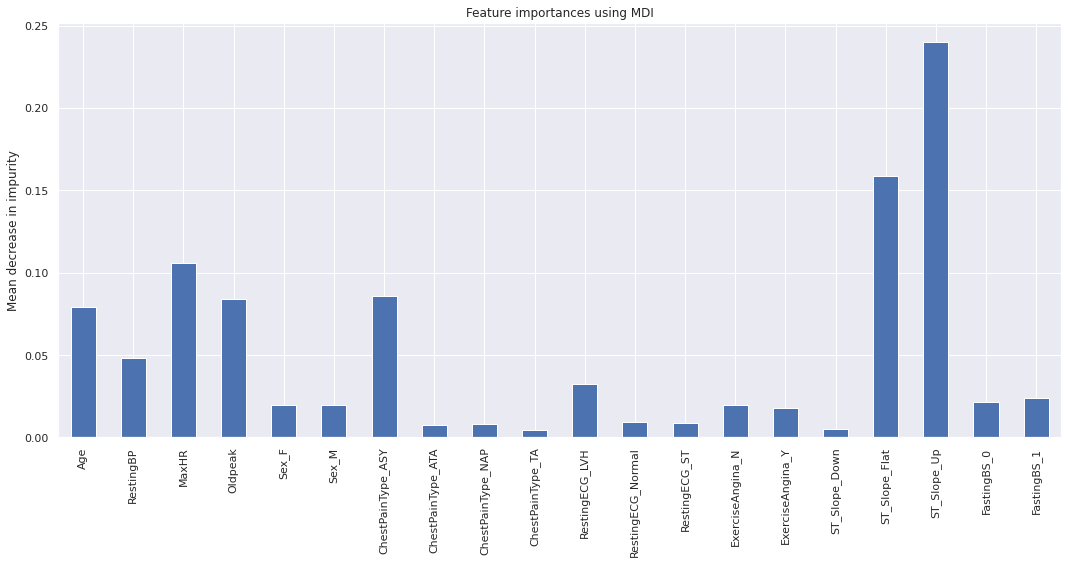

In [45]:
topScore = max(rfScores_auc)
topModel = rfModels_auc[0]
for i in range(len(rfScores_auc)):
    if rfScores_auc[i] == topScore:
        topModel = rfModels_auc[i]
bestModel_RF = topModel.best_estimator_.named_steps["model_rf"]

importances = bestModel_RF.feature_importances_
forest_importances = pd.Series(importances, index=xFeatures)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
#The most important features seem to be ST_slope up and flat

In [46]:
model_xgb = xgb.XGBClassifier(random_state=1,objective='binary:logistic',eval_metric='logloss',use_label_encoder=False)
xgb_pipeline = Pipeline([
    ('model_xgb', model_xgb)
])

xgb_param= {
    'model_xgb__max_depth': [2, 3, 5,7,9],
    'model_xgb__n_estimators': [10, 100, 500]}
xgb_random_f1 = RandomizedSearchCV(xgb_pipeline, xgb_param, cv=cv_inner, scoring='f1')
xgb_random_auc = RandomizedSearchCV(xgb_pipeline, xgb_param, cv=cv_inner, scoring='roc_auc')


In [47]:
xgbModels_f1 = []
xgbScores_f1 = []

xgbModels_auc = []
xgbScores_auc = []

#For colab add this code
for i in range(len(inBags)):
  outBags[i]["Age"] = outBags[i]["Age"].astype(float)
  outBags[i]["RestingBP"] = outBags[i]["RestingBP"].astype(float)
  outBags[i]["MaxHR"] = outBags[i]["MaxHR"].astype(float)
  outBags[i]["Oldpeak"] = outBags[i]["Oldpeak"].astype(float)

for i in range(len(inBags)):
    print(i)
    model_f1 = xgb_random_f1.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    xgbModels_f1.append(model_f1)
    
    model_auc = xgb_random_auc.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    xgbModels_auc.append(model_auc)
    
    curScore_f1 = f1_score(outBags[i][yFeatures].squeeze().tolist(), model_f1.predict(outBags[i][xFeatures]))
    xgbScores_f1.append(curScore_f1)
    
    curScore_auc = roc_auc_score(outBags[i][yFeatures].squeeze().tolist(), model_auc.predict(outBags[i][xFeatures]))
    xgbScores_auc.append(curScore_auc)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [48]:
print(xgbScores_f1)
print(xgbScores_auc)

[0.8598726114649682, 0.881578947368421, 0.8432055749128919, 0.8522336769759451, 0.8657718120805369, 0.8370607028753995, 0.8562091503267973, 0.8610169491525422, 0.8338983050847457, 0.8709677419354839, 0.8486842105263157, 0.862190812720848, 0.8561643835616437, 0.8873239436619719, 0.8478260869565216, 0.8434504792332268, 0.8469055374592835, 0.8194444444444444, 0.9084745762711864, 0.8295819935691319, 0.8376623376623378, 0.8309859154929577, 0.8472222222222222, 0.8777429467084639, 0.8648648648648649, 0.8581560283687943, 0.8581081081081081, 0.879746835443038, 0.840764331210191, 0.8484848484848485, 0.8695652173913043, 0.878688524590164, 0.8417508417508416, 0.809688581314879, 0.8282828282828283, 0.8362369337979093, 0.8727272727272727, 0.8480565371024734, 0.8680555555555555, 0.8459016393442622]
[0.8217074440395628, 0.8497535654362416, 0.8092044134727061, 0.8475081256771398, 0.8511116367076631, 0.8221199872354005, 0.8529323398629972, 0.8423423423423424, 0.8089080459770115, 0.8500137854976565, 0.81

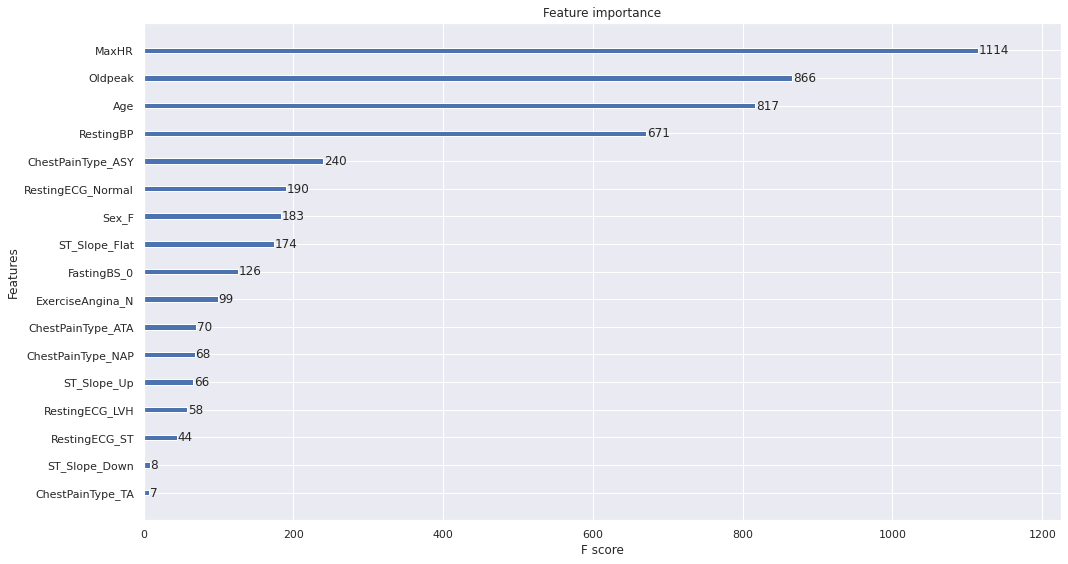

In [49]:
from xgboost import plot_importance 

topScore = max(xgbScores_auc)
topModel = xgbModels_auc[0]
for i in range(len(xgbModels_auc)):
    if xgbScores_auc[i] == topScore:
        topModel = xgbModels_auc[i]

bestModel_XGB = topModel.best_estimator_.named_steps["model_xgb"]

plot_importance(bestModel_XGB)

#Here it appears that MaxHR and oldpeak are the most important

In [50]:
from sklearn import svm


model_svm=svm.SVC()
svm_pipeline = Pipeline([ 
    ('model_svm',model_svm)
])
svm_param = {
               'model_svm__kernel': ['linear'],
               'model_svm__gamma': ['scale', 'auto'],
               'model_svm__C': [.1, .5, 1, 1.5, 2]}

svm_random_f1 = RandomizedSearchCV(svm_pipeline, svm_param, cv=cv_inner, scoring='f1', random_state=42)
svm_random_auc = RandomizedSearchCV(svm_pipeline, svm_param, cv=cv_inner, scoring='roc_auc', random_state=42)

In [51]:
svmModels_f1 = []
svmScores_f1 = []

svmModels_auc = []
svmScores_auc = []

for i in range(len(inBags)):
    print(i)
    model_f1 = svm_random_f1.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    svmModels_f1.append(model_f1)

    model_auc = svm_random_auc.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    svmModels_auc.append(model_auc)

    curScore_f1 = f1_score(outBags[i][yFeatures].squeeze().tolist(), model_f1.predict(outBags[i][xFeatures]))
    svmScores_f1.append(curScore_f1)

    curScore_auc = roc_auc_score(outBags[i][yFeatures].squeeze().tolist(), model_auc.predict(outBags[i][xFeatures]))
    svmScores_auc.append(curScore_auc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


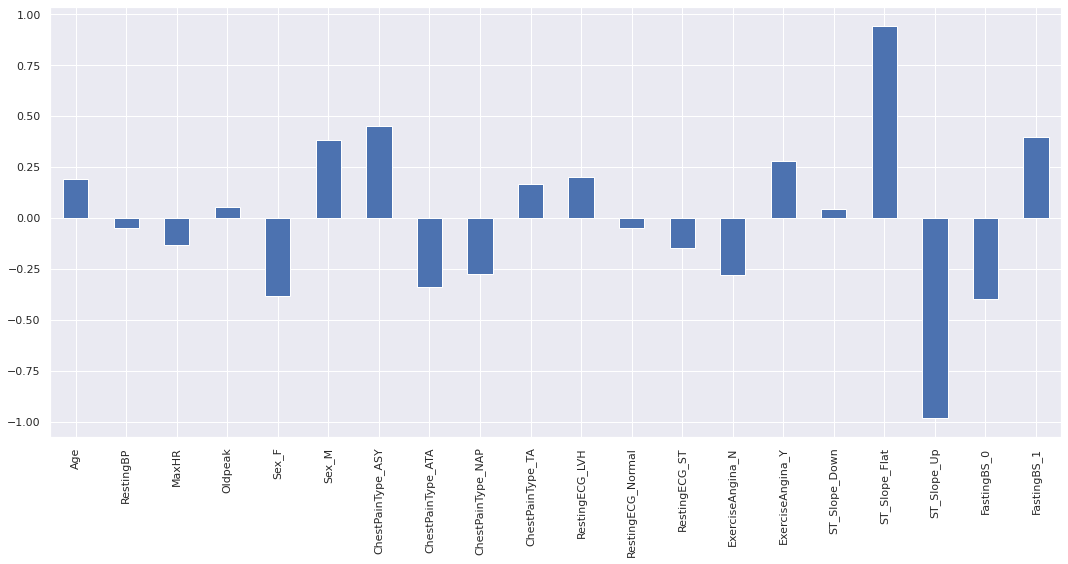

In [52]:
topScore = max(svmScores_auc)
topModel = svmModels_auc[0]
for i in range(len(svmScores_auc)):
    if svmScores_auc[i] == topScore:
        topModel = svmModels_auc[i]
        
bestModel_SVM = topModel.best_estimator_.named_steps["model_svm"]

importances = bestModel_SVM.coef_
#permutation importance

forest_importances = pd.Series(importances[0], index=xFeatures)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()

#The features with the largest absolute values for their coeficiants were ST_slope flat and up.

In [53]:
#Friedman
stats.friedmanchisquare(svmScores_auc,xgbScores_auc,rfScores_auc) #Gets the Friedman statistic
#There is no significant difference between the three models

FriedmanchisquareResult(statistic=3.106918238993745, pvalue=0.21151505108679292)

In [54]:
print("SVM Scores mean" + str(sum(svmScores_auc)/ 40))
print("RF Scores mean" + str(sum(rfScores_auc)/ 40))
print("XGB Scores mean" + str(sum(xgbScores_auc)/ 40))

SVM Scores mean0.8427461149670833
RF Scores mean0.833734514389254
XGB Scores mean0.835031623013666


In [55]:
#Drop index for test dfs
X_test = X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [56]:
scaler = StandardScaler() #Creates a SKlearn standard Scaler object
scaler.fit(X_test[numFeatures])
X_test[numFeatures]=scaler.transform(X_test[numFeatures])
X_test = pd.get_dummies(X_test, columns=catFeatures)  

In [57]:
yhat=bestModel_RF.predict(X_test)
aucscore=roc_auc_score(yhat,y_test)
print(aucscore)
#The RF model appears to be slightly overfit

0.8265107212475633


In [58]:
!pip install shap
import shap

shap.initjs()
explainer = shap.KernelExplainer(bestModel_RF.predict_proba,inBags[0][xFeatures])
shap_values = explainer.shap_values(X_test.iloc[10,:])
#SHAP values for class 0 outcomes
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[10,:], feature_names = X_test.columns)

     |████████████████████████████████| 564 kB 5.2 MB/s 


Using 733 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In this plot, we can see how features contributed to the model’s prediction for a specific observation.The model predict_proba value is: 0.10
The base value, the average of the model output over the training dataset (explainer.expected_value in the code) is 0.459 In blue, we have negative Shap values that show everything that pushes the heart disease values in the negative direction. While the Shap value in red represents everything that pushes it towards a positive direction. The forces that drive the prediction lower is Asymptomatic Chest Pain. Whereas zero ST_slope_flat has a meaningful effect increasing the prediction.

In [59]:
#SHAP values for class 1 outcomes
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[10,:], feature_names = X_test.columns)

The predicted value is 0.9 and the base value is 0.54. The feature that increases the prediction that heart disease is 1 is Asymptomatic Chest Pain. While ST_slope flat and up decreases the prediction.

## Analysis with Cholesterol

In [60]:
df = dfC
allFeatures.append("Cholesterol")

In [61]:
df[allFeatures]

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Cholesterol
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,289
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,180
2,37,M,ATA,130,0,ST,98,N,0.0,Up,283
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,214
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,195
...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,0,Normal,132,N,1.2,Flat,264
913,68,M,ASY,144,1,Normal,141,N,3.4,Flat,193
914,57,M,ASY,130,0,Normal,115,Y,1.2,Flat,131
915,57,F,ATA,130,0,LVH,174,N,0.0,Flat,236


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df[allFeatures], df["HeartDisease"], test_size = 0.2, random_state=42, stratify=df["HeartDisease"])


In [63]:
train = pd.concat([X_train, y_train], axis=1)
train = train.reset_index(drop=True)
train

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Cholesterol,HeartDisease
0,49,M,ASY,128,0,Normal,96,Y,0.0,Flat,212,1
1,68,M,NAP,134,1,Normal,151,Y,0.0,Up,254,0
2,59,M,NAP,126,1,Normal,134,N,2.2,Flat,218,1
3,67,M,ASY,125,1,Normal,163,N,0.2,Flat,254,1
4,52,M,ASY,160,0,Normal,94,Y,2.5,Flat,331,1
...,...,...,...,...,...,...,...,...,...,...,...,...
728,51,M,NAP,135,0,Normal,150,N,2.0,Flat,160,1
729,46,M,NAP,120,0,Normal,150,N,0.0,Up,230,0
730,59,M,NAP,131,0,Normal,128,Y,2.0,Down,0,1
731,61,M,ASY,125,0,ST,115,Y,0.0,Up,292,0


In [64]:
np.random.seed(1) #Set a random seed for reproducibility
inBags = [] 
outBags = []

for i in range(40): #Loop through 50 times to create 50 InBags/OutBags
    
    curInBag = sklearn.utils.resample(train, replace=True) #Creates a boot strap inBag the length of boston with replacement
    
    outBagRows = [] #to hold all of the rows not represented in the inBag
    for i in range(len(train)): 
        if i not in np.unique(list(curInBag.index)):  #Check to see if the row is not represented in the current in bag
            
            outBagRows.append(train.loc[i].to_frame().T) # When I select a row not in the in bag, it is a series
                                                           # I Use the .to_frame to convert the series to a DataFrame
                                                           # The data Frame is oriented the wrong way so the .T transposes it
    
    curOutBag = pd.concat(outBagRows) #This concatenates all of the out bag rows into one DF

    #This if statment checks to see if every row of boston is represnted between the cur inbag and the cur outbag
    if len(np.unique(list(curInBag.index))) + len(np.unique(list(curOutBag.index))) != len(train):
        print("ERROR! ALl of the unique values should be represented")

    #Add the inbag/outBag to their respective lists
    inBags.append(curInBag)
    outBags.append(curOutBag)

In [65]:
scaler = StandardScaler() #Creates a SKlearn standard Scaler object

for i in range(len(inBags)): #Loop through each of the inBags
    
    #STANDARD SCALER
    scaler.fit(inBags[i][numFeatures]) #Transforms inBags
    inBags[i][numFeatures]=scaler.transform(inBags[i][numFeatures])

    scaler.fit(outBags[i][numFeatures]) #Transforms outBags
    outBags[i][numFeatures]=scaler.transform(outBags[i][numFeatures])
    
    #ENCODE CATEGORICAL VARIABLES
   
    inBags[i] = pd.get_dummies(inBags[i], columns=catFeatures)  #Transform inBags
    outBags[i] = pd.get_dummies(outBags[i], columns=catFeatures)  #Transform outBags
    


In [66]:
xFeatures = inBags[0].columns.tolist()
xFeatures.remove('HeartDisease')
yFeatures = ['HeartDisease']

In [67]:
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

model_rf=RandomForestClassifier(random_state=1)
rf_pipeline = Pipeline([ 
    ('model_rf',model_rf)
])
rf_param = {
               'model_rf__bootstrap': [True, False],
               'model_rf__max_depth': [2, 3, 5, 7, 9],
               'model_rf__max_features': [10],
               'model_rf__n_estimators': [10, 100, 500]} 

rf_random_f1 = RandomizedSearchCV(rf_pipeline, rf_param, cv=cv_inner, scoring='f1')
rf_random_auc = RandomizedSearchCV(rf_pipeline, rf_param, cv=cv_inner, scoring='roc_auc')

In [68]:
rfModels_f1_c = []
rfModels_auc_c = []

rfScores_f1_c = []
rfScores_auc_c = []

for i in range(len(inBags)):
    print(i)
    model_f1 = rf_random_f1.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    rfModels_f1_c.append(model_f1)
    
    model_auc = rf_random_auc.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    rfModels_auc_c.append(model_auc)
    
    curScore_f1 = f1_score(outBags[i][yFeatures].squeeze().tolist(), model_f1.predict(outBags[i][xFeatures]))
    rfScores_f1_c.append(curScore_f1)
    
    curScore_auc = roc_auc_score(outBags[i][yFeatures].squeeze().tolist(), model_auc.predict(outBags[i][xFeatures]))
    rfScores_auc_c.append(curScore_auc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [69]:
print(rfScores_f1_c)
print(rfScores_auc_c)

[0.8734177215189874, 0.8704318936877075, 0.85, 0.8561643835616439, 0.8802588996763754, 0.840764331210191, 0.8881789137380193, 0.8389261744966443, 0.8610169491525425, 0.8580645161290322, 0.8802588996763754, 0.8689655172413793, 0.8494983277591973, 0.8710801393728224, 0.852112676056338, 0.8717948717948718, 0.8553054662379421, 0.8571428571428571, 0.8783783783783783, 0.8488745980707395, 0.8662420382165605, 0.9047619047619048, 0.8610169491525423, 0.8734177215189874, 0.8926174496644297, 0.8671328671328672, 0.8646864686468647, 0.8571428571428571, 0.8722741433021807, 0.8350168350168351, 0.86084142394822, 0.8758169934640523, 0.8384879725085911, 0.825503355704698, 0.8459016393442624, 0.8504983388704318, 0.8819875776397514, 0.8701754385964913, 0.8552188552188552, 0.8338983050847457]
[0.8436288969865232, 0.8575660654362416, 0.8345818815331011, 0.8439869989165764, 0.8600402081362346, 0.8158440591426444, 0.8624864799903859, 0.8072072072072073, 0.8420977011494253, 0.8564653984008822, 0.859090909090909

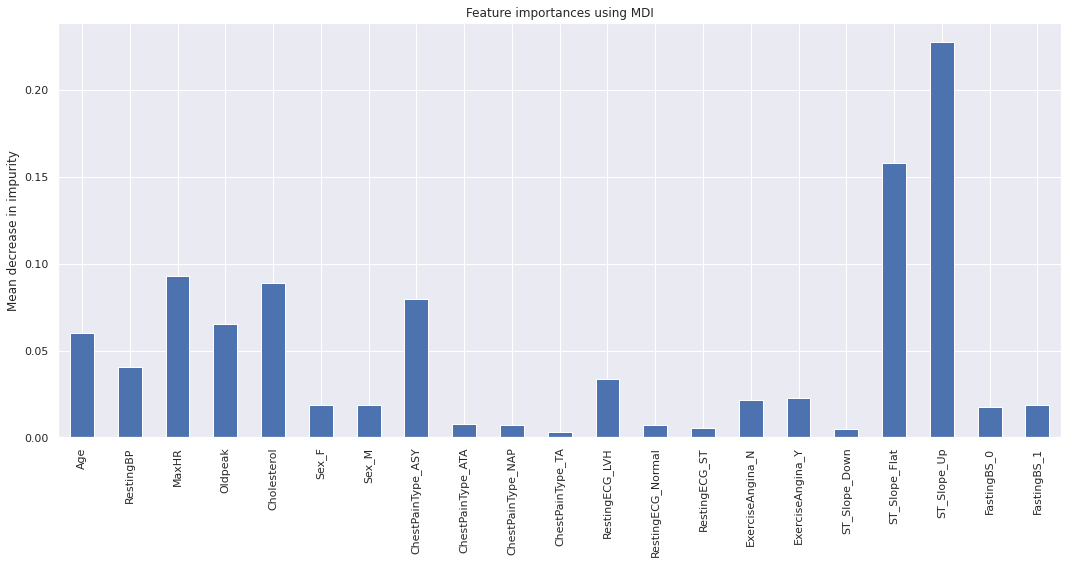

In [70]:
topScore = max(rfScores_auc_c)
topModel = rfModels_auc_c[0]
for i in range(len(rfScores_auc_c)):
    if rfScores_auc_c[i] == topScore:
        topModel = rfModels_auc_c[i]
bestModel_RF = topModel.best_estimator_.named_steps["model_rf"]

importances = bestModel_RF.feature_importances_
forest_importances = pd.Series(importances, index=xFeatures)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#It seems that Cholesterol is actually an important feature for Random Forest

In [71]:
model_xgb = xgb.XGBClassifier(random_state=1,objective='binary:logistic',eval_metric='logloss',use_label_encoder=False)
xgb_pipeline = Pipeline([
    ('model_xgb', model_xgb)
])

xgb_param= {
    'model_xgb__max_depth': [2, 3, 5,7,9],
    'model_xgb__n_estimators': [10, 100, 500]}
xgb_random_f1 = RandomizedSearchCV(xgb_pipeline, xgb_param, cv=cv_inner, scoring='f1')
xgb_random_auc = RandomizedSearchCV(xgb_pipeline, xgb_param, cv=cv_inner, scoring='roc_auc')


In [72]:
xgbModels_f1_c = []
xgbScores_f1_c = []

xgbModels_auc_c = []
xgbScores_auc_c = []

#For colab add this code
for i in range(len(inBags)):
  outBags[i]["Age"] = outBags[i]["Age"].astype(float)
  outBags[i]["RestingBP"] = outBags[i]["RestingBP"].astype(float)
  outBags[i]["MaxHR"] = outBags[i]["MaxHR"].astype(float)
  outBags[i]["Oldpeak"] = outBags[i]["Oldpeak"].astype(float)
  outBags[i]["Cholesterol"] = outBags[i]["Cholesterol"].astype(float)


for i in range(len(inBags)):
    print(i)
    model_f1 = xgb_random_f1.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    xgbModels_f1_c.append(model_f1)
    
    model_auc = xgb_random_auc.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    xgbModels_auc_c.append(model_auc)
    
    curScore_f1 = f1_score(outBags[i][yFeatures].squeeze().tolist(), model_f1.predict(outBags[i][xFeatures]))
    xgbScores_f1_c.append(curScore_f1)
    
    curScore_auc = roc_auc_score(outBags[i][yFeatures].squeeze().tolist(), model_auc.predict(outBags[i][xFeatures]))
    xgbScores_auc_c.append(curScore_auc)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [73]:
print(xgbScores_f1_c)
print(xgbScores_auc_c)

[0.8525641025641026, 0.8762541806020067, 0.8472222222222222, 0.8482758620689653, 0.894736842105263, 0.8598726114649682, 0.8881789137380193, 0.8484848484848485, 0.8503401360544218, 0.8846153846153846, 0.8721311475409836, 0.8591549295774648, 0.8619528619528619, 0.8780487804878048, 0.8686131386861313, 0.8627450980392156, 0.8769716088328077, 0.8380281690140844, 0.8631578947368421, 0.8645161290322579, 0.8461538461538461, 0.8819444444444444, 0.8741258741258742, 0.8698412698412699, 0.8888888888888888, 0.8409893992932862, 0.8686868686868687, 0.8553459119496856, 0.86875, 0.8698630136986302, 0.8729641693811075, 0.8750000000000001, 0.8304498269896194, 0.8211920529801325, 0.835016835016835, 0.847457627118644, 0.875, 0.8642857142857143, 0.8677966101694916, 0.8610169491525423]
[0.8468968708427324, 0.858116610738255, 0.8335946573751452, 0.8478331527627302, 0.8888363292336803, 0.8400170194660141, 0.8386612186035333, 0.8290540540540541, 0.8310344827586207, 0.8489660876757651, 0.8408264462809917, 0.8383

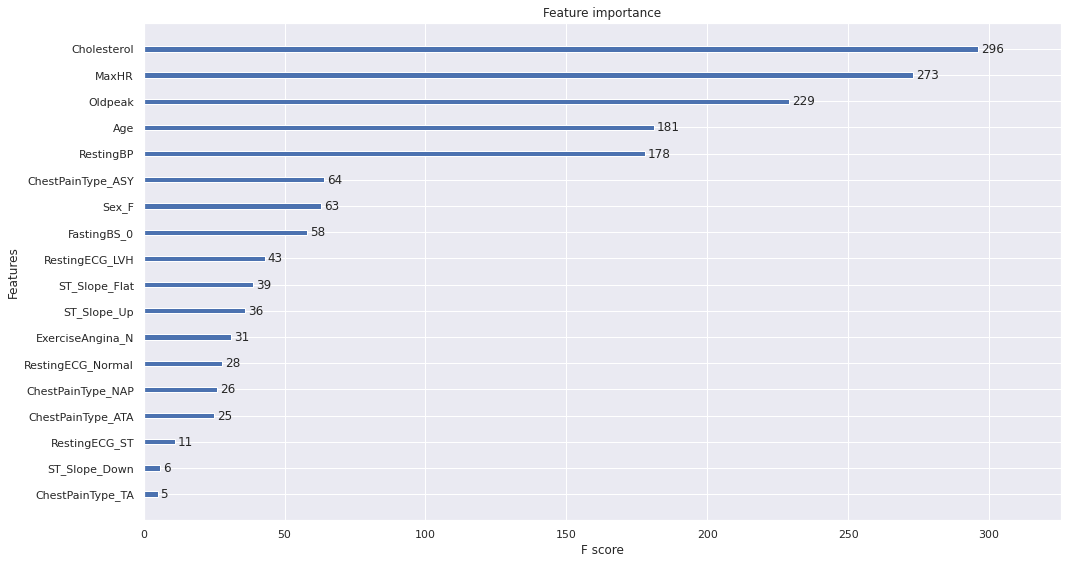

In [74]:
from xgboost import plot_importance 

topScore = max(xgbScores_auc_c)
topModel = xgbModels_auc_c[0]
for i in range(len(xgbModels_auc_c)):
    if xgbScores_auc_c[i] == topScore:
        topModel = xgbModels_auc_c[i]

bestModel_XGB = topModel.best_estimator_.named_steps["model_xgb"]

plot_importance(bestModel_XGB)
#Again, cholesterol is an important feature for XGB

In [75]:
from sklearn import svm


model_svm=svm.SVC()
svm_pipeline = Pipeline([ 
    ('model_svm',model_svm)
])
svm_param = {
               'model_svm__kernel': ['linear'],
               'model_svm__gamma': ['scale', 'auto'],
               'model_svm__C': [.1, .5, 1, 1.5, 2]}

svm_random_f1 = RandomizedSearchCV(svm_pipeline, svm_param, cv=cv_inner, scoring='f1', random_state=42)
svm_random_auc = RandomizedSearchCV(svm_pipeline, svm_param, cv=cv_inner, scoring='roc_auc', random_state=42)

In [76]:
svmModels_f1_c = []
svmScores_f1_c = []
#FIXME add _c to scores and models
svmModels_auc_c = []
svmScores_auc_c = []

for i in range(len(inBags)):
    print(i)
    model_f1 = svm_random_f1.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    svmModels_f1_c.append(model_f1)

    model_auc = svm_random_auc.fit(inBags[i][xFeatures], np.asarray(inBags[i][yFeatures].squeeze().tolist()))
    svmModels_auc_c.append(model_auc)

    curScore_f1 = f1_score(outBags[i][yFeatures].squeeze().tolist(), model_f1.predict(outBags[i][xFeatures]))
    svmScores_f1_c.append(curScore_f1)

    curScore_auc = roc_auc_score(outBags[i][yFeatures].squeeze().tolist(), model_auc.predict(outBags[i][xFeatures]))
    svmScores_auc_c.append(curScore_auc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


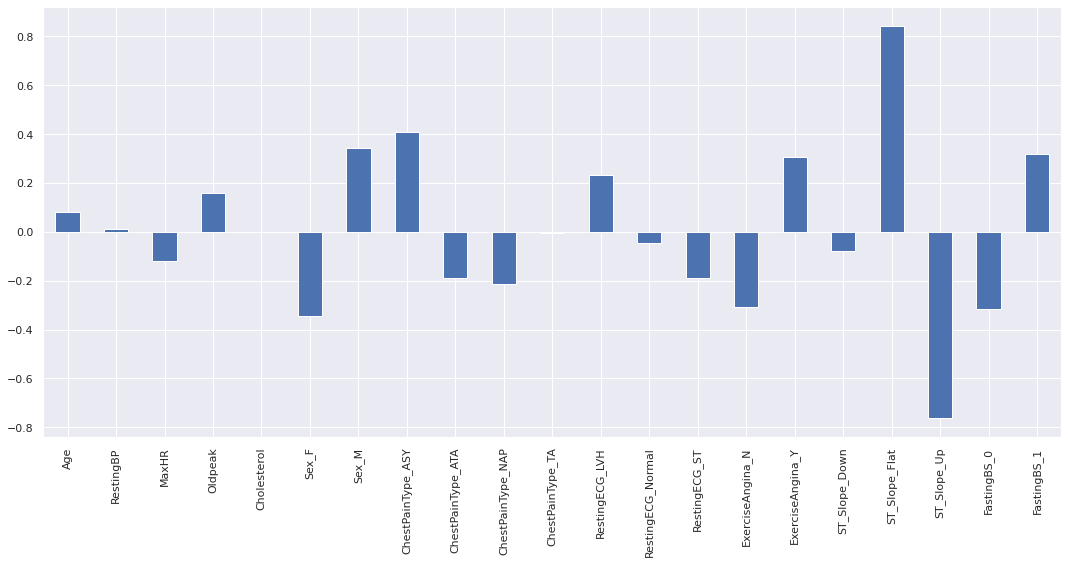

In [77]:
topScore = max(svmScores_auc_c)
topModel = svmModels_auc_c[0]
for i in range(len(svmScores_auc_c)):
    if svmScores_auc_c[i] == topScore:
        topModel = svmModels_auc_c[i]
        
bestModel_SVM = topModel.best_estimator_.named_steps["model_svm"]

importances = bestModel_SVM.coef_
#permutation importance

forest_importances = pd.Series(importances[0], index=xFeatures)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()

#Cholesterol seems to have a coeficiant of 0

In [78]:
#Friedman
stats.friedmanchisquare(svmScores_auc_c,xgbScores_auc_c,rfScores_auc_c) #Gets the Friedman statistic
#There is no significant difference between the three models

FriedmanchisquareResult(statistic=3.9500000000000455, pvalue=0.13876131224295213)

In [79]:
print("SVM Scores mean" + str(sum(svmScores_auc_c)/ 40))
print("RF Scores mean" + str(sum(rfScores_auc_c)/ 40))
print("XGB Scores mean" + str(sum(xgbScores_auc_c)/ 40))

SVM Scores mean0.8486967622633136
RF Scores mean0.8419347717143172
XGB Scores mean0.8445630959920502


In [80]:
#Tests to see if including cholesterol gets significantly different results than excluding cholesterol
stats.friedmanchisquare(svmScores_auc,xgbScores_auc,rfScores_auc,svmScores_auc_c,xgbScores_auc_c,rfScores_auc_c)
#When testing the difference between with and with out cholesterol scores, we get a significan difference

FriedmanchisquareResult(statistic=24.845988538681926, pvalue=0.0001492048723816689)

In [81]:
#Drop index for test dfs
X_test = X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [82]:
scaler = StandardScaler() #Creates a SKlearn standard Scaler object
scaler.fit(X_test[numFeatures])
X_test[numFeatures]=scaler.transform(X_test[numFeatures])
X_test = pd.get_dummies(X_test, columns=catFeatures)  

In [83]:
yhat=bestModel_RF.predict(X_test)
aucscore=roc_auc_score(yhat,y_test)
print(aucscore)

0.8403316235237981


In [84]:
!pip install shap
import shap

shap.initjs()
explainer = shap.KernelExplainer(bestModel_RF.predict_proba,inBags[0][xFeatures])
shap_values = explainer.shap_values(X_test.iloc[10,:])
#SHAP values for class 0 outcomes
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[10,:], feature_names = X_test.columns)

Using 733 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


The forces that drive the prediction that the patient has no risk of heart disease lower is Cholestrol. Whereas ST_slope_up has a meaningful effect increasing the prediction. The baseline value is 0.463 and the predicted value is 0.07

In [85]:
shap.initjs()
#SHAP values for class 1 outcomes
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[10,:], feature_names = X_test.columns)

The predicted value is .93 and the base value is 0.5368. The forces that drive the prediction lower is ST_slope_Up. Whereas zero cholestrol has a meaningful effect increasing the prediction.

### Discussion

In testing our with cholesterol/without cholesterol we decided to use the Random Forest model to repot the final test score. We decided to use RF because there was no significant difference between the three classifiers in either test. We also did this because we ran the shap analysis using the best RF model (because we were more familiar with shap using RF). 

The cholesterol analysis classifiers seem to be very slightly overfit. The RF training scores had a mean score of 84.41. The final test had a score of 84.40. 

The analysis without cholesterol was maybe slightly more over fit with a training mean of 83.37, and a final test score of 82.6.

Our first hypothosis, that XGB would perform significantly better than the other two models was wrong. When comparing the scores of the three models with and without cholesterol, the friedmand test failed to reach significance. 

Our second hypthosis, that the anlysis with out cholesterol would yield a better result was also wrong. When we compared the score of with cholesterol and without cholesterol, the friedman test reached significance. On average, all of the the models achieved high AUC scores when cholesterol was included. 

Other discussion:

*   The data set didn't have any very highly correlated variables. The two highest correlated features with the Heart disease were oldPeak and MaxHR.
*   We found it interesting to look at the shap analysis for the study with cholesterol. The most important driving feature was Cholesterol = 0 on both Shap plots. This is especially interesting because we thought that the cholesterol = 0 values would not be helpful in the analysis.
*   With PCA/kmeans, it was difficult to seperate the data into two groups by just performing dimensionality reduction. By using the elbow method we found that the best seperation came by using k = 2. However, even using k=2, we couldn't get a good visual seperation. 







### Limitations
The limitations of this project are that we had a small dataset, abnormal cholesterol data, and data from 5 different sources. The variety in sources adds difficulty to the project because it is likely that various hospitals have different conventions and produce slightly different test results. The combination of data sources may have resulted in abnormal cholesterol data. This limitation could be addressed by communicating with the institutions that have provided the data. Other future work involves experimentation with different approaches such as neural networks.